# **Lane Detection using OpenCV**

### **0. Do the necessary imports**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **1 a) Read the image**

In [2]:
img = cv2.imread("images/test.png")

### **1 b) Make a copy of the original image**

In [3]:
lane_img = np.copy(img)

### **2. We define a function to detect the edges in the image**

#### **a) First the function converts the image to a grayscale image**
#### **b) Then the function applies Gaussian Filtering on the grayscale image to smoothen out the image and reduce noise**
#### **c) Finally the function applies the canny method to detect the edges in the image**


In [17]:
def canny_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    g_blur = cv2.GaussianBlur(gray, (5,5), 0)
    
    canny_img = cv2.Canny(g_blur, 50, 150)

#Comment the below lines when running the code for lane detection in a video
    
    plt.imshow(gray)
    plt.show()

    plt.imshow(g_blur)
    plt.show()
    
    plt.imshow(canny_img)
    plt.show()
    
    
    return canny_img

#### **d) View the results of the function from each step**

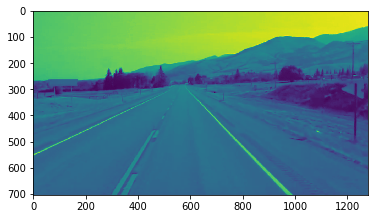

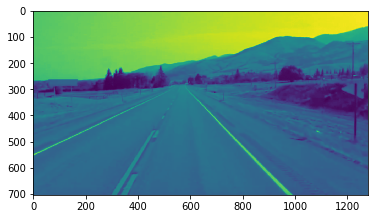

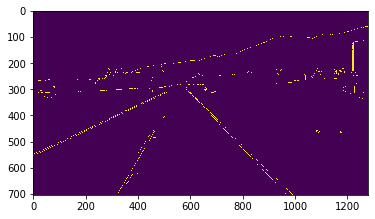

In [18]:
canny_result = canny_image(lane_img)

### **3. We define a function to Specify the Region of Interest (ROI)**

#### **a) The funtion first generates co-ordinates for a triangle shaped polygon**

#### **b) Then the function creates a black background with same dimension as the original image**

#### **c) The function then uses the fillPoly method to create a mask with the enclosed polygon**

#### **d) Finally the function uses the Bitwise_and operation on the mask and the canny image to get only the lanes in the image**


In [19]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    cropped_img = cv2.bitwise_and(image, mask)
    
#Comment the below lines when running the code for lane detection in a video
    
    plt.imshow(mask)
    plt.show()

    plt.imshow(cropped_img)
    plt.show()
    
    return cropped_img

#### **e) View the results of the function from each step**

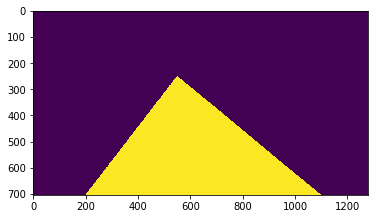

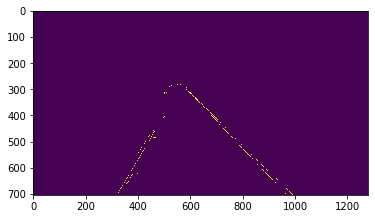

In [20]:
cropped_img = region_of_interest(canny_result)

### **4. Perform Hough Transformation to detect any straight line for a given image**

#### **a) Use a function to display the straight lines in image**

In [29]:
lines = cv2.HoughLinesP(cropped_img, 2, np.pi/180, 100, np.array([]), minLineLength=10, maxLineGap=5)

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for i in lines:
            x1, y1, x2, y2 = i.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0,0), 10)
            
    return line_image

#### **b) View the result of the function output**

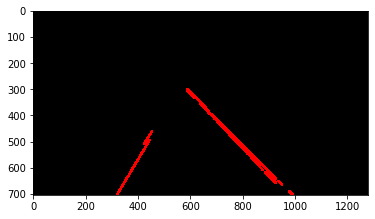

In [30]:
line_img = display_lines(lane_img, lines)
plt.imshow(line_img)
plt.show()

### **5. Optimize the lines by displaying the average slope and intercept for left lane and right lane**

#### **a) We first define a function for creating co-ordinates from the average slope and intercept**

In [23]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2-intercept)/slope)
    
    return np.array([x1, y1, x2, y2])

#### **b) We then define a function for getting the average slope and intercept and the co-ordinates for left and right lane**

In [24]:
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    
    for i in lines:
        x1, y1, x2, y2 = i.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        
        if slope < 0:
            left_fit.append((slope, intercept))
            
        else:
            right_fit.append((slope, intercept))
            
    left_fit_avg = np.average(left_fit, axis=0)
        
    right_fit_avg = np.average(right_fit, axis=0)

    left_line = make_coordinates(image, left_fit_avg)
    right_line = make_coordinates(image, right_fit_avg)
    
    
    return np.array([left_line, right_line])

#### **c) View the results of the function output**

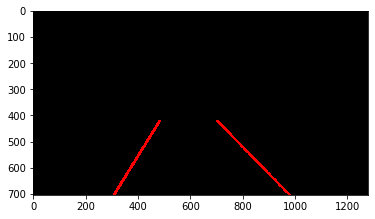

In [25]:
avg_line = average_slope_intercept(lane_img, lines)
avg_line_img = display_lines(lane_img, avg_line)
plt.imshow(avg_line_img)
plt.show()

### **6. Superpose the line image and the lane image to get the final result**

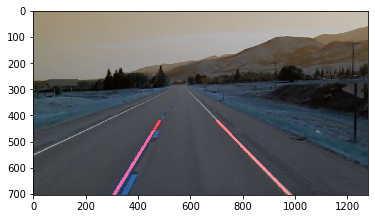

In [26]:
final_image = cv2.addWeighted(lane_img, 0.8, avg_line_img, 1, 1)
plt.imshow(final_image)
plt.show()

### **7. Detect lanes in a video**

In [16]:
cap = cv2.VideoCapture("test_video.mp4")
while(cap.isOpened()):
    _, frame = cap.read()
    canny = canny_image(frame)
    cropped_img = region_of_interest(canny)
    lines = cv2.HoughLinesP(cropped_img, 2, np.pi/180, 100, np.array([]), minLineLength=10, maxLineGap=5)
    avg_line = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, avg_line)
    final_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    cv2.imshow("Result", final_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### **Credit: Rayan Slim (Identify Lane Lines with OpenCV & Python)**